## Utilizando pandas_datareader

In [26]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

data = pdr.get_data_yahoo("BOVA11.SA", start="2019-01-01")
data.head()

In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-27,118.660004,118.800003,116.000000,116.040001,116.040001,6485811
2023-07-28,116.510002,116.930000,115.949997,116.519997,116.519997,2943366
2023-07-31,117.230003,118.339996,117.150002,117.949997,117.949997,3889613
2023-08-01,117.199997,117.790001,116.349998,117.519997,117.519997,3444566
2023-08-02,116.919998,117.470001,115.970001,117.010002,117.010002,6537586


In [9]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [10]:
ordem = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [11]:
data = data[ordem]

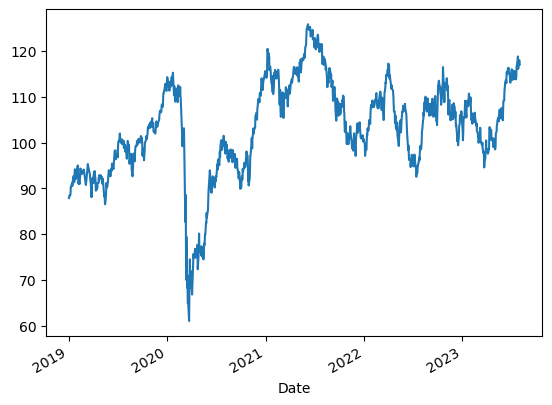

In [13]:
data.Close.plot();

In [14]:
data.shape

(1127, 6)

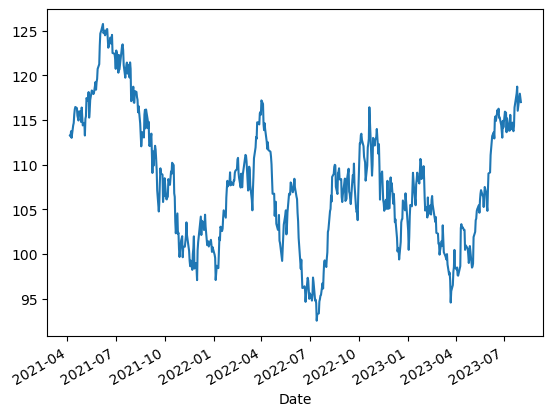

In [18]:
data.Close.iloc[545:].plot();

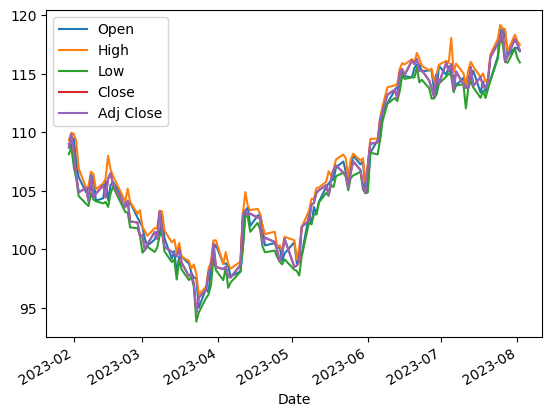

In [25]:
data[['Open', 'High', 'Low', 'Close', 'Adj Close']].iloc[1000:].plot();

## Conceito de normalização

In [28]:
lista = ['WEGE3.SA', 'MGLU3.SA', 'EMBR3.SA', '^BVSP', 'HCTR11.SA', 'SMAL11.SA']

In [30]:
import pandas as pd

In [43]:
data = pd.DataFrame()

In [44]:
for i in lista: 
    data[i] = pdr.get_data_yahoo(i, start = '2021-01-01').Close

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [45]:
data.head()

,WEGE3.SA,MGLU3.SA,EMBR3.SA,^BVSP,HCTR11.SA,SMAL11.SA
Date,,,,,,
2021-01-04,37.310001,25.200001,8.37,118558.0,150.110001,134.000000
2021-01-05,39.599998,24.760000,8.57,119223.0,150.110001,133.699997
2021-01-06,40.650002,23.459999,8.90,119851.0,151.020004,131.600006
2021-01-07,42.330002,23.160000,8.88,121956.0,152.080002,130.949997
2021-01-08,44.889999,23.840000,8.81,125077.0,150.059998,132.529999


In [46]:
data.shape

(644, 6)

In [48]:
data_sem_na = data.dropna()

In [50]:
data_sem_na.shape

(644, 6)

In [51]:
import matplotlib.pyplot as plt

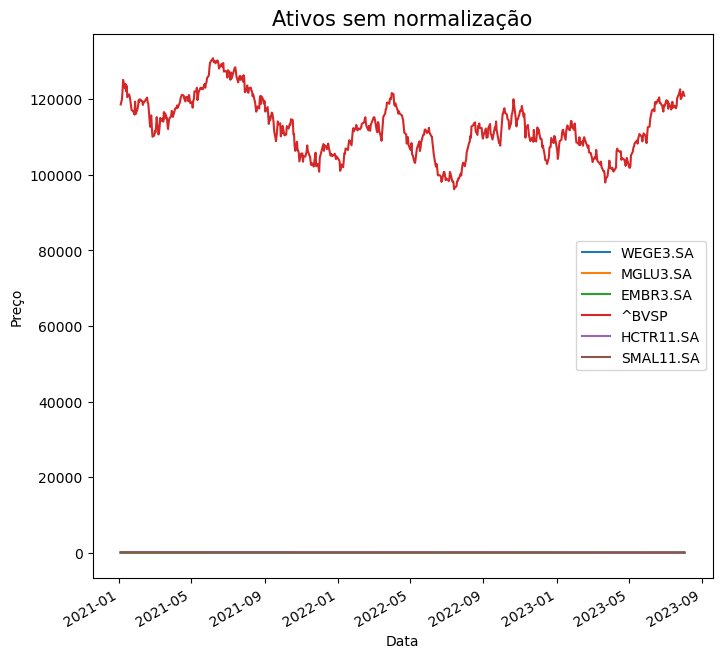

In [54]:
data_sem_na.plot(figsize = [8,8])
plt.title('Ativos sem normalização', fontsize = 15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()

In [56]:
data_sem_na.head()

,WEGE3.SA,MGLU3.SA,EMBR3.SA,^BVSP,HCTR11.SA,SMAL11.SA
Date,,,,,,
2021-01-04,37.310001,25.200001,8.37,118558.0,150.110001,134.000000
2021-01-05,39.599998,24.760000,8.57,119223.0,150.110001,133.699997
2021-01-06,40.650002,23.459999,8.90,119851.0,151.020004,131.600006
2021-01-07,42.330002,23.160000,8.88,121956.0,152.080002,130.949997
2021-01-08,44.889999,23.840000,8.81,125077.0,150.059998,132.529999


In [58]:
normalizado = data_sem_na/data_sem_na.iloc[0]

In [59]:
normalizado.head()

,WEGE3.SA,MGLU3.SA,EMBR3.SA,^BVSP,HCTR11.SA,SMAL11.SA
Date,,,,,,
2021-01-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2021-01-05,1.061378,0.982540,1.023895,1.005609,1.000000,0.997761
2021-01-06,1.089520,0.930952,1.063321,1.010906,1.006062,0.982090
2021-01-07,1.134548,0.919048,1.060932,1.028661,1.013124,0.977239
2021-01-08,1.203163,0.946032,1.052569,1.054986,0.999667,0.989030


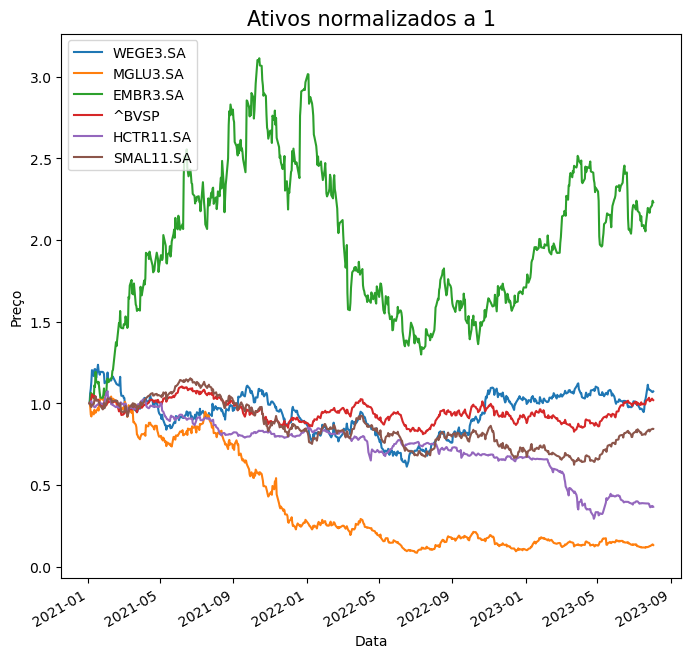

In [60]:
normalizado.plot(figsize = [8,8])
plt.title('Ativos normalizados a 1', fontsize = 15)
plt.xlabel('Data')
plt.ylabel('Preço')
plt.show()